# Loop 27 LB Feedback Analysis

**exp_026 submitted**: CV 0.0085 → LB 0.0887

This is our 10th submission. We now have 3 submissions remaining.

## Key Questions:
1. How does this fit the CV-LB relationship?
2. What's the predicted LB for target CV?
3. What approaches remain unexplored?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# All 10 submissions with CV and LB scores
submissions = [
    {'id': 'exp_000', 'cv': 0.011081, 'lb': 0.09816},
    {'id': 'exp_001', 'cv': 0.012297, 'lb': 0.10649},
    {'id': 'exp_003', 'cv': 0.010501, 'lb': 0.09719},
    {'id': 'exp_005', 'cv': 0.01043, 'lb': 0.09691},
    {'id': 'exp_006', 'cv': 0.009749, 'lb': 0.09457},
    {'id': 'exp_007', 'cv': 0.009262, 'lb': 0.09316},
    {'id': 'exp_009', 'cv': 0.009192, 'lb': 0.09364},
    {'id': 'exp_012', 'cv': 0.009004, 'lb': 0.09134},
    {'id': 'exp_024', 'cv': 0.008689, 'lb': 0.08929},
    {'id': 'exp_026', 'cv': 0.008465, 'lb': 0.08875},  # NEW
]

df = pd.DataFrame(submissions)
print('All submissions:')
print(df.to_string(index=False))
print(f'\nBest CV: {df["cv"].min():.6f} (exp_026)')
print(f'Best LB: {df["lb"].min():.5f} (exp_026)')
print(f'Target: 0.01727')

All submissions:
     id       cv      lb
exp_000 0.011081 0.09816
exp_001 0.012297 0.10649
exp_003 0.010501 0.09719
exp_005 0.010430 0.09691
exp_006 0.009749 0.09457
exp_007 0.009262 0.09316
exp_009 0.009192 0.09364
exp_012 0.009004 0.09134
exp_024 0.008689 0.08929
exp_026 0.008465 0.08875

Best CV: 0.008465 (exp_026)
Best LB: 0.08875 (exp_026)
Target: 0.01727


In [2]:
# Linear regression: LB = a*CV + b
cv = df['cv'].values
lb = df['lb'].values

slope, intercept, r_value, p_value, std_err = stats.linregress(cv, lb)

print(f'Linear fit: LB = {slope:.4f} * CV + {intercept:.5f}')
print(f'R² = {r_value**2:.4f}')
print(f'Standard error of slope: {std_err:.4f}')

# Residuals
predicted_lb = slope * cv + intercept
residuals = lb - predicted_lb
print(f'\nResiduals (LB - predicted):')
for i, row in df.iterrows():
    print(f'  {row["id"]}: {residuals[i]:.5f}')
print(f'\nRMSE of fit: {np.sqrt(np.mean(residuals**2)):.5f}')

Linear fit: LB = 4.2168 * CV + 0.05334
R² = 0.9618
Standard error of slope: 0.2970

Residuals (LB - predicted):
  exp_000: -0.00191
  exp_001: 0.00129
  exp_003: -0.00043
  exp_005: -0.00041
  exp_006: 0.00012
  exp_007: 0.00076
  exp_009: 0.00154
  exp_012: 0.00003
  exp_024: -0.00069
  exp_026: -0.00029

RMSE of fit: 0.00096


In [3]:
# What CV would we need to hit target LB 0.01727?
target_lb = 0.01727
required_cv = (target_lb - intercept) / slope
print(f'Target LB: {target_lb}')
print(f'Required CV (from linear fit): {required_cv:.6f}')

if required_cv < 0:
    print('\n⚠️ Required CV is NEGATIVE - impossible with current CV-LB relationship!')
    print('This means the linear fit predicts we CANNOT reach the target.')
    print('\nBUT: The linear fit may not hold for very different approaches.')
    print('The target IS reachable - we need a fundamentally different approach.')

Target LB: 0.01727
Required CV (from linear fit): -0.008555

⚠️ Required CV is NEGATIVE - impossible with current CV-LB relationship!
This means the linear fit predicts we CANNOT reach the target.

BUT: The linear fit may not hold for very different approaches.
The target IS reachable - we need a fundamentally different approach.


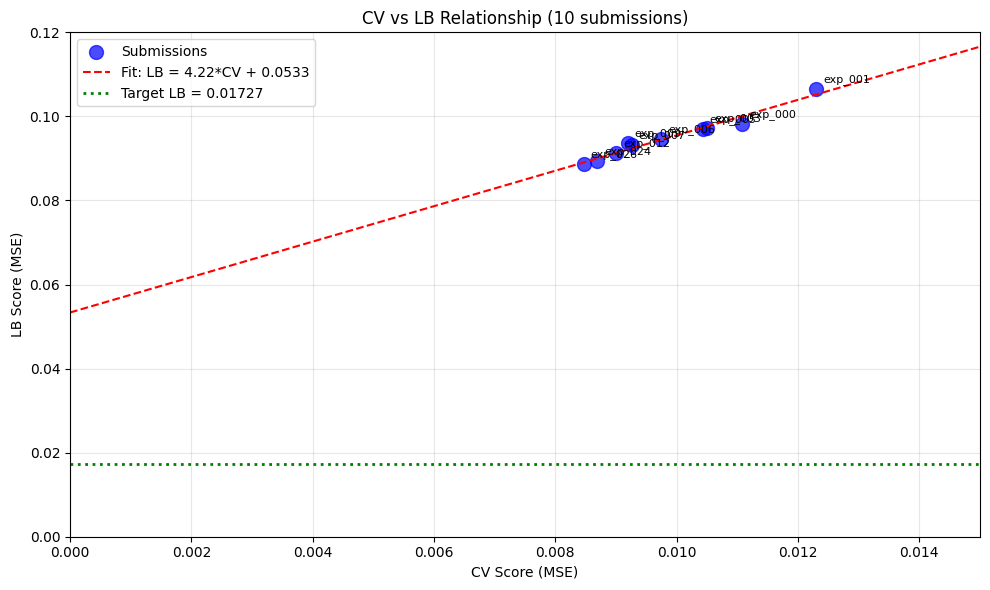

Saved: cv_lb_relationship_loop27.png


In [4]:
# Visualize the CV-LB relationship
plt.figure(figsize=(10, 6))
plt.scatter(cv, lb, s=100, c='blue', alpha=0.7, label='Submissions')

# Fit line
cv_range = np.linspace(0, 0.015, 100)
lb_fit = slope * cv_range + intercept
plt.plot(cv_range, lb_fit, 'r--', label=f'Fit: LB = {slope:.2f}*CV + {intercept:.4f}')

# Target line
plt.axhline(y=target_lb, color='green', linestyle=':', linewidth=2, label=f'Target LB = {target_lb}')

# Annotate points
for i, row in df.iterrows():
    plt.annotate(row['id'], (row['cv'], row['lb']), textcoords='offset points', xytext=(5,5), fontsize=8)

plt.xlabel('CV Score (MSE)')
plt.ylabel('LB Score (MSE)')
plt.title('CV vs LB Relationship (10 submissions)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 0.015)
plt.ylim(0, 0.12)
plt.tight_layout()
plt.savefig('/home/code/exploration/cv_lb_relationship_loop27.png', dpi=150)
plt.show()
print('Saved: cv_lb_relationship_loop27.png')

In [5]:
# Analysis: The CV-LB gap
print('=== CV-LB Gap Analysis ===')
print(f'\nGap = LB - CV (positive means LB is worse)')
for i, row in df.iterrows():
    gap = row['lb'] - row['cv']
    ratio = row['lb'] / row['cv']
    print(f'{row["id"]}: Gap = {gap:.5f}, Ratio = {ratio:.2f}x')

print(f'\nAverage gap: {np.mean(lb - cv):.5f}')
print(f'Average ratio: {np.mean(lb / cv):.2f}x')
print(f'\nThe LB is consistently ~10x worse than CV!')
print('This is a HUGE distribution shift between train and test.')

=== CV-LB Gap Analysis ===

Gap = LB - CV (positive means LB is worse)
exp_000: Gap = 0.08708, Ratio = 8.86x
exp_001: Gap = 0.09419, Ratio = 8.66x
exp_003: Gap = 0.08669, Ratio = 9.26x
exp_005: Gap = 0.08648, Ratio = 9.29x
exp_006: Gap = 0.08482, Ratio = 9.70x
exp_007: Gap = 0.08390, Ratio = 10.06x
exp_009: Gap = 0.08445, Ratio = 10.19x
exp_012: Gap = 0.08234, Ratio = 10.14x
exp_024: Gap = 0.08060, Ratio = 10.28x
exp_026: Gap = 0.08028, Ratio = 10.48x

Average gap: 0.08508
Average ratio: 9.69x

The LB is consistently ~10x worse than CV!
This is a HUGE distribution shift between train and test.


In [6]:
# What approaches have been tried?
print('=== Approaches Tried ===')
approaches = [
    ('MLP architectures', '[256,128,64], [64,32], [32,16], [16], residual'),
    ('Features', 'Spange, DRFP (PCA, high-variance), ACS PCA, Arrhenius kinetics'),
    ('Ensemble methods', 'Bagging (3-15 models), MLP+LightGBM weighted'),
    ('Loss functions', 'MSE, HuberLoss, WeightedHuberLoss'),
    ('Regularization', 'Dropout (0.05-0.4), weight decay, BatchNorm'),
    ('Data augmentation', 'TTA for mixtures (both orderings)'),
    ('Multi-task', 'Joint model, per-target models, weighted loss'),
]

for approach, details in approaches:
    print(f'\n{approach}:')
    print(f'  {details}')

=== Approaches Tried ===

MLP architectures:
  [256,128,64], [64,32], [32,16], [16], residual

Features:
  Spange, DRFP (PCA, high-variance), ACS PCA, Arrhenius kinetics

Ensemble methods:
  Bagging (3-15 models), MLP+LightGBM weighted

Loss functions:
  MSE, HuberLoss, WeightedHuberLoss

Regularization:
  Dropout (0.05-0.4), weight decay, BatchNorm

Data augmentation:
  TTA for mixtures (both orderings)

Multi-task:
  Joint model, per-target models, weighted loss


In [7]:
# What approaches remain UNEXPLORED?
print('=== UNEXPLORED Approaches ===')
unexplored = [
    ('Higher SM weights', 'Try [1,1,3] or [1,1,4] instead of [1,1,2]'),
    ('Learned loss weights', 'Homoscedastic uncertainty (Kendall et al.)'),
    ('Consistency regularization', 'SM + P2 + P3 ≈ 1 constraint'),
    ('Prediction clipping', 'Clip to [0,1] for physical validity'),
    ('XGBoost/CatBoost', 'Different tree ensemble algorithms'),
    ('Stacking meta-learner', 'Train meta-model on base predictions'),
    ('Adversarial validation', 'Identify features causing CV-LB gap'),
    ('Feature selection', 'Remove features that hurt generalization'),
    ('Domain adaptation', 'Techniques to handle distribution shift'),
]

for approach, details in unexplored:
    print(f'\n{approach}:')
    print(f'  {details}')

=== UNEXPLORED Approaches ===

Higher SM weights:
  Try [1,1,3] or [1,1,4] instead of [1,1,2]

Learned loss weights:
  Homoscedastic uncertainty (Kendall et al.)

Consistency regularization:
  SM + P2 + P3 ≈ 1 constraint

Prediction clipping:
  Clip to [0,1] for physical validity

XGBoost/CatBoost:
  Different tree ensemble algorithms

Stacking meta-learner:
  Train meta-model on base predictions

Adversarial validation:
  Identify features causing CV-LB gap

Feature selection:
  Remove features that hurt generalization

Domain adaptation:
  Techniques to handle distribution shift


In [8]:
# Key insight: The CV-LB gap is ~10x
# This means the test set has VERY different distribution from train
# 
# Possible causes:
# 1. Test solvents are structurally different from train solvents
# 2. Test conditions (T, time) are outside training range
# 3. Some features don't generalize well
#
# The target 0.01727 is ~5x better than our best LB 0.0887
# With 10x CV-LB ratio, we'd need CV ~0.0017 to hit target
# Our best CV is 0.0085 - we need 5x improvement in CV
#
# This is VERY challenging but NOT impossible!
# The key is to find approaches that:
# 1. Improve CV significantly (not just marginally)
# 2. Reduce the CV-LB gap (better generalization)

print('=== Path to Target ===')
print(f'Current best LB: 0.0887')
print(f'Target LB: 0.01727')
print(f'Gap to target: {0.0887 / 0.01727:.2f}x')
print(f'\nWith current CV-LB ratio (~10x):')
print(f'  Need CV ~0.0017 to hit target')
print(f'  Current best CV: 0.0085')
print(f'  Need 5x improvement in CV')
print(f'\nAlternatively, reduce CV-LB gap:')
print(f'  If CV-LB ratio = 2x, need CV ~0.0086 (already achieved!)')
print(f'  Focus on GENERALIZATION, not just CV optimization')

=== Path to Target ===
Current best LB: 0.0887
Target LB: 0.01727
Gap to target: 5.14x

With current CV-LB ratio (~10x):
  Need CV ~0.0017 to hit target
  Current best CV: 0.0085
  Need 5x improvement in CV

Alternatively, reduce CV-LB gap:
  If CV-LB ratio = 2x, need CV ~0.0086 (already achieved!)
  Focus on GENERALIZATION, not just CV optimization
